# Lecture 8
- Central limit theorem

In [35]:

import numpy as np
import numpy.random as npr
import random
import itertools

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('ggplot')

import scipy.stats as stats

In [36]:
# For the simple motivating example
import matplotlib.ticker as ticker  # Import ticker for formatting


In [37]:
E = stats.expon(scale= 4)
E.mean()

4.0

# First, can we use simulation to solve this question?
A machine process parts, one at a time, in a time independently and uniformly distributed in [1,5]. 
What is the probability the machine processes at least 100 parts in 320 time units? 

In [38]:
n=100 # the total number of parts.

# define the random variable for the time needed for processing one part.
X = stats.uniform(loc =1, scale = 4)
mu = X.mean()
sigma = X.std()# standard deviation, recall variance = sigma**2
mu, sigma

(3.0, 1.1547005383792515)

In [39]:
# todo implement a simulation to compute the probability
num_sims = 10_000 
count=0
for i in range(num_sims):
    Xseq = X.rvs(size = n)
    if np.sum(Xseq) <= 320: 
        count += 1
print("The relative frequency of processing at least 100 parts in 320 time unit", count/num_sims)

The relative frequency of processing at least 100 parts in 320 time unit 0.9537


In [40]:
def getSn(n): 
    num_sims = 10_000
    Sn = np.zeros(num_sims)
    for i in range(num_sims):
        Xseq = X.rvs(size = n)
        Sn[i] = np.sum(Xseq)
    return Sn

(array([1.000e+00, 1.000e+00, 2.000e+00, 6.000e+00, 1.000e+01, 2.100e+01,
        3.800e+01, 8.000e+01, 1.380e+02, 2.490e+02, 3.220e+02, 4.950e+02,
        6.430e+02, 8.220e+02, 9.240e+02, 1.006e+03, 1.070e+03, 1.015e+03,
        8.300e+02, 7.130e+02, 5.680e+02, 4.210e+02, 2.410e+02, 1.750e+02,
        1.080e+02, 5.300e+01, 3.100e+01, 6.000e+00, 8.000e+00, 3.000e+00]),
 array([2846.02518127, 2855.56939851, 2865.11361575, 2874.65783299,
        2884.20205022, 2893.74626746, 2903.2904847 , 2912.83470194,
        2922.37891917, 2931.92313641, 2941.46735365, 2951.01157089,
        2960.55578812, 2970.10000536, 2979.6442226 , 2989.18843984,
        2998.73265707, 3008.27687431, 3017.82109155, 3027.36530879,
        3036.90952602, 3046.45374326, 3055.9979605 , 3065.54217774,
        3075.08639498, 3084.63061221, 3094.17482945, 3103.71904669,
        3113.26326393, 3122.80748116, 3132.3516984 ]),
 <BarContainer object of 30 artists>)

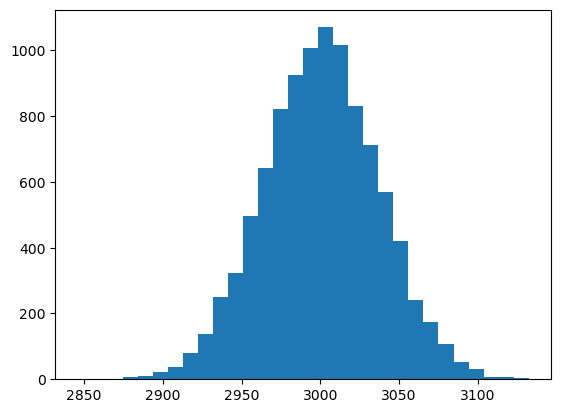

In [41]:
Sn = getSn(1000)
plt.hist(Sn, bins = 30, label='Sn[i]')

In [42]:
def getSnMnZn(n): 
    num_sims = 10_000
    Sn = np.zeros(num_sims)
    Mn = np.zeros(num_sims)
    Zn = np.zeros(num_sims)
    for i in range(num_sims):
        Xseq=  X.rvs(n) 
        Sn[i] =  np.sum(Xseq)
        Mn[i] =  Sn[i]/n
        Zn[i] =  (Sn[i] - n*mu)/(sigma*np.sqrt(n))
    return Sn, Mn, Zn

(array([3.93163718e-04, 1.57265487e-03, 1.57265487e-03, 1.96581859e-03,
        5.11112834e-03, 1.17949115e-02, 2.67351328e-02, 3.34189161e-02,
        5.89745577e-02, 1.06547368e-01, 1.52547523e-01, 2.16633209e-01,
        2.78359913e-01, 3.10992501e-01, 3.59744802e-01, 3.84907280e-01,
        3.99061174e-01, 3.60531130e-01, 3.38907125e-01, 2.64992346e-01,
        2.18205864e-01, 1.40359447e-01, 1.05761040e-01, 7.03763056e-02,
        4.28548453e-02, 1.69060399e-02, 1.17949115e-02, 6.29061949e-03,
        2.35898231e-03, 1.96581859e-03]),
 array([-4.07960801, -3.82526104, -3.57091408, -3.31656711, -3.06222014,
        -2.80787317, -2.5535262 , -2.29917923, -2.04483226, -1.79048529,
        -1.53613833, -1.28179136, -1.02744439, -0.77309742, -0.51875045,
        -0.26440348, -0.01005651,  0.24429046,  0.49863743,  0.75298439,
         1.00733136,  1.26167833,  1.5160253 ,  1.77037227,  2.02471924,
         2.27906621,  2.53341318,  2.78776014,  3.04210711,  3.29645408,
         3.55080

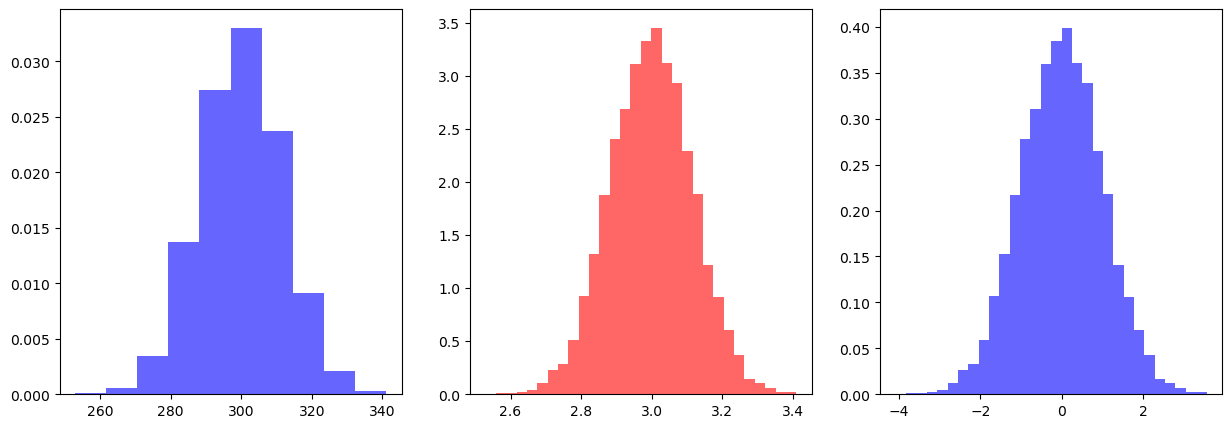

In [43]:
#PLOTING
Sn, Mn, Zn = getSnMnZn(100)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

axes[0].hist(Sn, density=True, alpha=0.6, color='blue', label='Sn[i]')
axes[1].hist(Mn, bins=30, density=True, alpha=0.6, color='red', label='Mn[i]')
axes[2].hist(Zn, bins=30, density=True, alpha=0.6, color='blue', label='Zn[i]')


In [26]:
from ipywidgets import interactive

In [44]:
def uplotMn(n):
    _, Mn, _ = getSnMnZn(n)
    plt.hist(Mn, bins=30)
    plt.xlim(-0.1, 6)
    
interactive_plot = interactive(uplotMn, n=100)
interactive_plot

interactive(children=(IntSlider(value=100, description='n', max=300, min=-100), Output()), _dom_classes=('widg…

In [45]:
def uplotSn(n):
    Sn,_, _ = getSnMnZn(n)
    plt.hist(Sn, bins=30)
    plt.xlim(-0.1,2500)
    
interactive_plot = interactive(uplotSn, n=100)
interactive_plot

interactive(children=(IntSlider(value=100, description='n', max=300, min=-100), Output()), _dom_classes=('widg…

In [46]:
def uplotZn(n):
    _,_, Zn = getSnMnZn(n)
    plt.hist(Zn, bins=30)
    plt.xlim(-5,5)
    
interactive_plot = interactive(uplotZn, n=100)
interactive_plot

interactive(children=(IntSlider(value=100, description='n', max=300, min=-100), Output()), _dom_classes=('widg…

## Revisit our problem

A machine process parts, one at a time, in a time independently and uniformly distributed in [1,5]. 
What is the probability the machine processes at least 100 parts in 320 time units? 

In [47]:
X0 = stats.uniform(loc = 1, scale = 4)
mu= X0.mean()
sigma = X0.std()

In [48]:
Zn = stats.norm(loc= 0, scale =1) 

In [49]:
threshold = (320 - n*mu)/(sigma*np.sqrt(n))

In [51]:
Zn.cdf(threshold) # probability of at least 100 parts in 320 time units

0.9583677416682248

## Example: customer support

A call center receives customer calls according to an exponential distribution with a mean wait time of 4 minutes.
Questions:
1. If a single customer calls, what is the probability that they wait more than 5 minutes?
2. If we take a random sample of 40 customers, what is the probability that their average wait time is more than 5 minutes? 

In [53]:
W = stats.expon(scale = 4) # scale is average wait time
#1  P(W >5)
W.sf(5)

0.2865047968601901

In [56]:
# 2. CONSTRUCT Gaussian for Mn
muW = W.mean()
sigmaW = W.std()
n = 40
M40 = stats.norm(loc=muW, scale = np.sqrt(sigmaW**2/n))
M40.sf(5)

0.006209665325776132

## Polling

$p$: The fraction of population that will vote "yes".

$X_i$: The i-th person's vote 

* What random variable $X_i$ is?

$n$: the number of samples we collect .

$M_n$: The fraction of "Yes" in the sample.

Question: What is the number of samples we need to collect so that 
$P(|M_n- p|\le 0.01)<0.05$

In [ ]:
# FIND THE NUMBER OF SAMPLES.